In [1]:
import numpy as np
import tensorflow as tf
import iris
import matplotlib.pyplot as plt
from neural_network_decision_tree import nn_decision_tree
%matplotlib inline

In [2]:
x = iris.feature[:, 2:4]  # use "Petal length" and "Petal width" only
y = iris.label
d = x.shape[1]

In [3]:
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3

In [4]:
sess = tf.InteractiveSession()
tf.set_random_seed(1943)

In [5]:
x_ph = tf.placeholder(tf.float32, [None, d])
y_ph = tf.placeholder(tf.float32, [None, num_class])

In [6]:
cut_points_list = [tf.Variable(tf.random_uniform([i])) for i in num_cut]
leaf_score = tf.Variable(tf.random_uniform([num_leaf, num_class]))

In [7]:
y_pred = nn_decision_tree(x_ph, cut_points_list, leaf_score, temperature=10)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_pred, y_ph))

In [8]:
opt = tf.train.AdamOptimizer(0.1)
train_step = opt.minimize(loss)

In [9]:
sess.run(tf.initialize_all_variables())

In [10]:
for i in range(1000):
    _, loss_e = sess.run([train_step, loss], feed_dict={x_ph: x, y_ph: y})
    if i % 200 == 0:
        print(loss_e)
print('error rate %.2f' % (1 - np.mean(np.argmax(y_pred.eval(feed_dict={x_ph: x}), axis=1) == np.argmax(y, axis=1))))

1.19311
0.462738
0.458426
0.450607
0.118448
error rate 0.04


In [11]:
sample_x0 = np.repeat(np.linspace(0, np.max(x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_label = np.argmax(y_pred.eval(feed_dict={x_ph: sample_x}), axis=1)

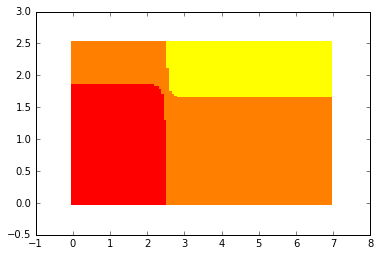

In [12]:
plt.scatter(sample_x0.flatten(), 
            sample_x1.flatten(), 
            c=sample_label.flatten(), 
            marker='s',
            cmap='autumn', 
            edgecolors='none')